# <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-bottom: 10px;">Time Series Analysis of Daily Steps Data</p>
<div style="margin-left: 25px;">
    Author     : Mutswari Unarine <br>
    Date       : 15 August 2023 <br>
    Github url : <url><a href="https://github.com/unis230"target="_blank">Unarine Mutswari</a>
</div>


<br/>

### <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-Top: 50px;">Combining files of data</p>


In [2]:
import pandas as pd
import os

# Directory where the files are located
directory = r'C:\Users\Azwihangwisi\Downloads\PD'

# List to store the data frames
data_frames = []

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Read each CSV file into a data frame
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        # Append the data frame to the list
        data_frames.append(df)

# Concatenate all data frames into a single data frame
combinedd_data_file = pd.concat(data_frames, ignore_index=True)


# Save the combined data to a new CSV file in the current working directory (Jupyter Notebook's directory)
output_file = 'combinedd_data_file.csv'
combinedd_data_file.to_csv(output_file, index=False)


# Show the first few rows of the combined data
combinedd_data_file.head()


,Date,Actual,Goal
0,May 31 2022,0,8000
1,Jun 1 2022,0,8000
2,Jun 2 2022,0,8000
3,Jun 3 2022,1102,8000
4,Jun 4 2022,1254,8000


<br/>

### <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-Top: 50px;">Data Preparation:</p>


In [3]:
df = pd.read_csv('combinedd_data_file.csv')

print(df.to_string()) 

            Date  Actual  Goal
0    May 31 2022       0  8000
1     Jun 1 2022       0  8000
2     Jun 2 2022       0  8000
3     Jun 3 2022    1102  8000
4     Jun 4 2022    1254  8000
5     Jun 5 2022    1792  8000
6     Jun 6 2022    3723  8000
7     Jun 7 2022    1540  8000
8     Jun 8 2022    4388  8000
9     Jun 9 2022       0  8000
10   Jun 10 2022    5413  8000
11   Jun 11 2022    4027  8000
12   Jun 12 2022    3970  8000
13   Jun 13 2022    8372  8000
14   Jun 14 2022    6329  8000
15   Jun 15 2022    7125  8000
16   Jun 16 2022    3445  8000
17   Jun 17 2022    2866  8000
18   Jun 18 2022    2119  8000
19   Jun 19 2022    2691  8000
20   Jun 20 2022    8279  8000
21   Jun 21 2022    1863  8000
22   Jun 22 2022    3477  8000
23   Jun 23 2022    4863  8000
24   Jun 24 2022    4005  8000
25   Jun 25 2022    6105  8000
26   Jun 26 2022    5744  8000
27   Jun 27 2022    7564  8000
28    Feb 7 2023    5417  8000
29    Feb 8 2023    3397  8000
30    Feb 9 2023   15341  8000
31   Feb

<br/>

In [4]:
df['Date']=pd.to_datetime(df['Date'])
print(df.head())

        Date  Actual  Goal
0 2022-05-31       0  8000
1 2022-06-01       0  8000
2 2022-06-02       0  8000
3 2022-06-03    1102  8000
4 2022-06-04    1254  8000


#### Seasonal imputation: replace 0 values with the average steps for the same day of the week

<div style="background-color: #f9f9f9; padding: 15px; border-left: 5px solid #007acc;">
  <p style="color: #007acc; font-weight: bold; font-size: 16px;">Important:</p>
  <p style="color: #555; font-size: 14px;">Seasonal imputation helps enhance data accuracy by replacing zero values with average steps for the same day of the week. This improves reliability in subsequent analyses.</p>
</div>


In [5]:
import numpy as np


# Replace zeros with NaN
df['Actual'] = df['Actual'].replace(0, np.nan)

# Perform seasonal imputation: replace missing values (NaN) with the average steps for the same day of the week
df['Actual'] = df.groupby(df['Date'].dt.weekday)['Actual'].transform(lambda x: x.fillna(x.mean()))
df['Actual'] = df['Actual'].astype(int)
df['Actual'] = df['Actual'].astype('int64')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    420 non-null    datetime64[ns]
 1   Actual  420 non-null    int64         
 2   Goal    420 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 10.0 KB
None


In [6]:
print(df.head())

        Date  Actual  Goal
0 2022-05-31    6241  8000
1 2022-06-01    6088  8000
2 2022-06-02    6330  8000
3 2022-06-03    1102  8000
4 2022-06-04    1254  8000


In [7]:
df.set_index('Date',verify_integrity=True ,inplace=True)
print(df.head())

            Actual  Goal
Date                    
2022-05-31    6241  8000
2022-06-01    6088  8000
2022-06-02    6330  8000
2022-06-03    1102  8000
2022-06-04    1254  8000


In [8]:
print(df)  

            Actual  Goal
Date                    
2022-05-31    6241  8000
2022-06-01    6088  8000
2022-06-02    6330  8000
2022-06-03    1102  8000
2022-06-04    1254  8000
...            ...   ...
2023-02-02    4969  8000
2023-02-03    4979  8000
2023-02-04    1441  8000
2023-02-05    3025  8000
2023-02-06    3956  8000

[420 rows x 2 columns]


<br/>

### <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-Top: 50px;">Data after preparation:</p>


In [9]:
import seaborn as sns


# Define a custom color palette from Seaborn
custom_palette = sns.color_palette("YlGnBu", as_cmap=True)

# Display the entire DataFrame with a background gradient using the custom palette and font style
styled_df = df.style.background_gradient(cmap=custom_palette).set_properties(
    **{'font-family': 'Arial', 'font-size': '12pt', 'text-align': 'center'}
)
styled_df

,Actual,Goal
Date,,
2022-05-31 00:00:00,6241,8000
2022-06-01 00:00:00,6088,8000
2022-06-02 00:00:00,6330,8000
2022-06-03 00:00:00,1102,8000
2022-06-04 00:00:00,1254,8000
2022-06-05 00:00:00,1792,8000
2022-06-06 00:00:00,3723,8000
2022-06-07 00:00:00,1540,8000
2022-06-08 00:00:00,4388,8000


<br/>

### <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-Top: 50px;">Exploratory Data Analysis (EDA):</p>


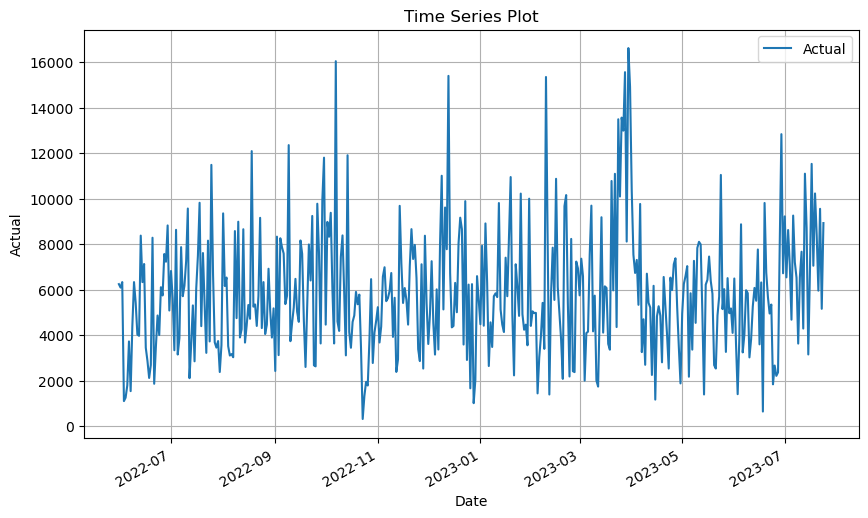

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Drop the 'goal' column from the DataFrame
df_without_goal = df.drop(columns=['Goal'])

# Plot the remaining columns using df.plot()
df_without_goal.plot(figsize=(10, 6))
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Actual')
plt.grid(True)
plt.show()


In [14]:
from IPython.display import display, HTML
import pandas as pd


# Calculate descriptive statistics for the 'Actual' column
descriptive_stats = df['Actual'].describe()

# Create the HTML content with minimalistic styling
html_content = f'''
<div style="font-family: Arial, sans-serif; margin: 20px auto; text-align: center;">
    <h2 style="color: #3498db;">Descriptive Statistics for Actual Steps</h2>
    <p style="font-size: 14px; color: #777;"><br/></p>
    <table style="border-collapse: collapse; border: 1px solid #ccc; width: 250px; margin: 0 auto;">
        <tr style="background-color: #f2f2f2; font-weight: bold;">
            <th style="padding: 10px;">Statistic</th>
            <th style="padding: 10px;">Value</th>
        </tr>
        <tr><td>Count:</td><td>{descriptive_stats["count"]:.0f}</td></tr>
        <tr><td>Mean:</td><td>{descriptive_stats["mean"]:.2f}</td></tr>
        <tr><td>Std Dev:</td><td>{descriptive_stats["std"]:.2f}</td></tr>
        <tr><td>Min:</td><td>{descriptive_stats["min"]:.2f}</td></tr>
        <tr><td>25%:</td><td>{descriptive_stats["25%"]:.2f}</td></tr>
        <tr><td>50%:</td><td>{descriptive_stats["50%"]:.2f}</td></tr>
        <tr><td>75%:</td><td>{descriptive_stats["75%"]:.2f}</td></tr>
        <tr><td>Max:</td><td>{descriptive_stats["max"]:.2f}</td></tr>
    </table>
</div>
'''

# Display the HTML content
display(HTML(html_content))


Statistic,Value
Count:,420
Mean:,5838.26
Std Dev:,2755.19
Min:,316.00
25%:,3877.00
50%:,5501.00
75%:,7349.00
Max:,16611.00


<br/>

### <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-Top: 50px;">Test for Seasonality and Stationarity:</p>


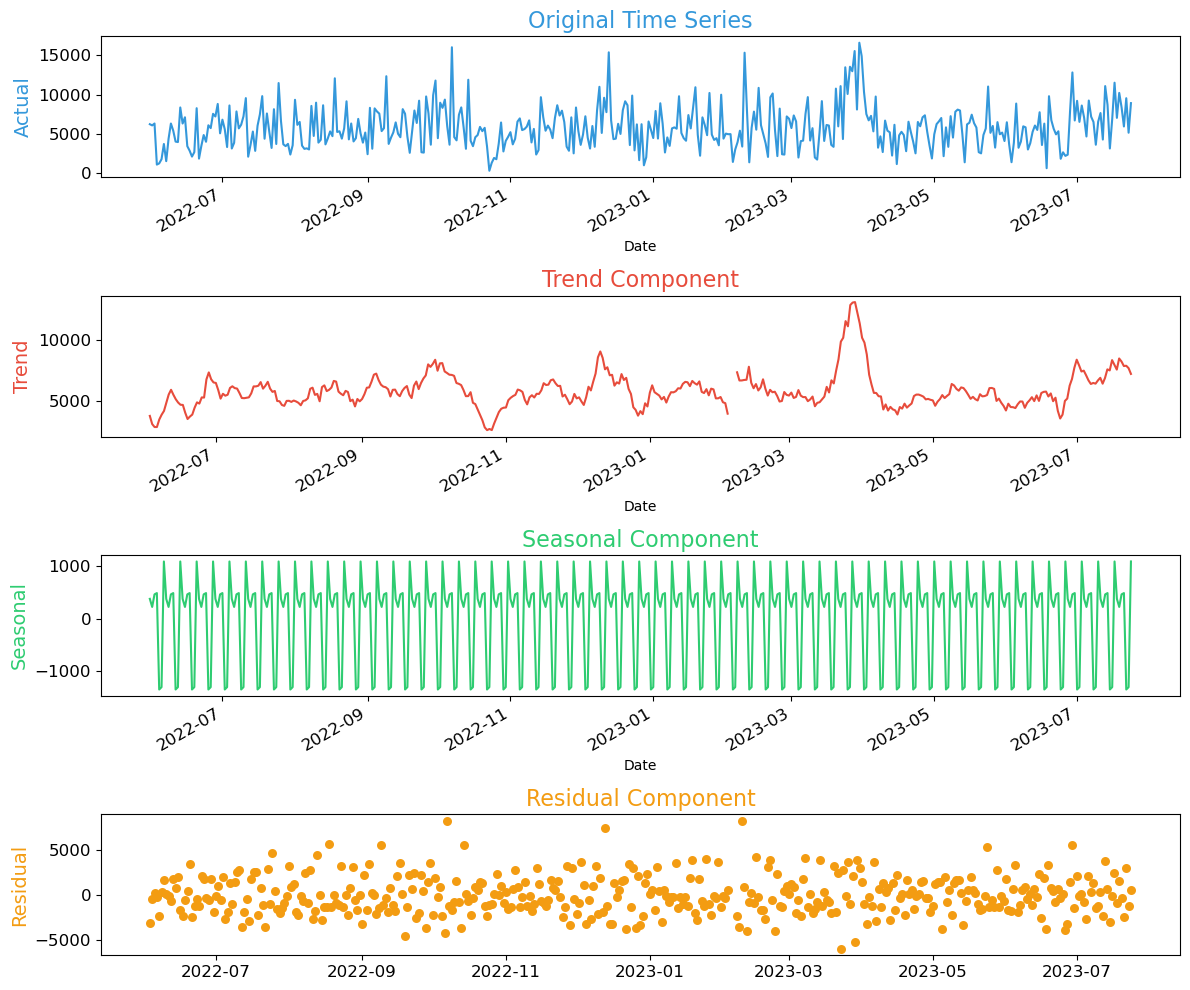

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
result = seasonal_decompose(df['Actual'], model='additive', period=7)

# Set up a color palette for visualizations
color_palette = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.6)

# Plot original time series
result.observed.plot(ax=axes[0], color=color_palette[0])
axes[0].set_title('Original Time Series', fontsize=16, color=color_palette[0])
axes[0].set_ylabel('Actual', fontsize=14, color=color_palette[0])

# Plot trend component
result.trend.plot(ax=axes[1], color=color_palette[1])
axes[1].set_title('Trend Component', fontsize=16, color=color_palette[1])
axes[1].set_ylabel('Trend', fontsize=14, color=color_palette[1])

# Plot seasonal component
result.seasonal.plot(ax=axes[2], color=color_palette[2])
axes[2].set_title('Seasonal Component', fontsize=16, color=color_palette[2])
axes[2].set_ylabel('Seasonal', fontsize=14, color=color_palette[2])

# Plot residual component as scatter dots
axes[3].scatter(result.resid.index, result.resid, color=color_palette[3], s=20, linewidths=2)
axes[3].set_title('Residual Component', fontsize=16, color=color_palette[3])
axes[3].set_ylabel('Residual', fontsize=14, color=color_palette[3])

# Adjust tick font size for better visibility
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


<br/>

<style>
  .highlight {
    font-size: 18px;
    font-weight: bold;
    color: #007ACC;
  }
  .quote {
    font-style: italic;
    color: #555555;
  }
</style>

<div class="highlight">Seasonal Decomposition Analysis</div>

<div class="quote">
  By employing seasonal decomposition on the provided time series, a compelling indication emerges that the data likely displays seasonality.
</div>


<br/>

### Augmented Dickey-Fuller test

In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(df['Actual'])

# Set up a stylish color palette
color_palette = ['#3498db', '#e74c3c', '#2ecc71']

# Display the ADF test results
print("\n\033[1m\033[4m Augmented Dickey-Fuller Test Results \033[0m")
print("\033[1mADF Statistic:\033[0m   \033[38;5;70m{:.4f}\033[0m".format(adf_result[0]))
print("\033[1mp-value:\033[0m          \033[38;5;70m{:.4f}\033[0m".format(adf_result[1]))
print("\033[1mCritical Values:\033[0m")
for key, value in adf_result[4].items():
    print("   {}: \033[38;5;70m{:.4f}\033[0m".format(key, value))
print("\033[1mIs Stationary:\033[0m     {}"
      .format('\033[38;5;40mYes\033[0m' if adf_result[0] < adf_result[4]['5%'] else '\033[38;5;196mNo\033[0m'))



 Augmented Dickey-Fuller Test Results 
ADF Statistic:   -5.3977
p-value:          0.0000
Critical Values:
   1%: -3.4468
   5%: -2.8688
   10%: -2.5706
Is Stationary:     Yes


<div style="background-color: #f4f4f4; padding: 20px;">
    <h2 style="color: #007ACC; font-weight: bold;">Data Analysis Results</h2>
    <p style="font-style: italic; color: #888888;">The analyzed data exhibits both <strong>seasonal</strong> and <strong>stationary</strong> characteristics.</p>
    <p style="font-style: italic; color: #888888;">The <strong>seasonality</strong> suggests a repeating pattern within the data at regular intervals.</p>
    <p style="font-style: italic; color: #888888;">The data's <strong>stationarity</strong> indicates that the statistical properties remain consistent over time, enhancing the reliability of our analysis.</p>
    <p style="color: #228B22; font-weight: bold;">Positive Insight: The presence of seasonality can provide valuable insights for predicting future patterns and making informed decisions.</p>
    <p style="color: #FF6347; font-weight: bold;">Potential Challenge: While seasonality can be advantageous, it might require specific modeling techniques to account for its effects.</p>
</div>


<br/>

### <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-Top: 50px;">Model Selection (ARIMA):</p>


### I have selected the ARIMA model for forecasting due to the stationary nature of the data.

<div style="background-color: #007ACC; padding: 20px; text-align: center; border-radius: 10px;">
    <h2 style="font-weight: bold; color: #ffffff;">Estimating Arima Parameters</h2>
    <p style="font-style: italic; color: #ffffff; margin-top: 10px;">Fine-tune the model by estimating its essential parameters for accurate predictions.using auto_arima technique</p>
</div>


In [21]:
from pmdarima import auto_arima

# Extract the 'Actual' column as the time series data
time_series_data = df['Actual']

# Fit an ARIMA model using auto_arima
model = auto_arima(time_series_data, seasonal=True, m=12, stepwise=True, trace=True,
                   suppress_warnings=True, error_action="ignore", max_order=None)

# Fit the best model found
model.fit(time_series_data)

# Summary of the best-fitting model
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=7827.326, Time=1.91 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7848.751, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=7837.665, Time=0.32 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=7840.893, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8562.814, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=7827.970, Time=0.86 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=7827.905, Time=0.80 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=7829.067, Time=2.69 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=7829.058, Time=2.81 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=7825.974, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=7830.960, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=7830.908, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=7827.367, Time=0.59 sec
 ARIMA(2,0,3)(0,0,0)[12] intercept   : AIC=7827.057, Time=0.76 sec
 ARIMA(1,0,1)(0,0,0

<div style="background-color: #f9f9f9; padding: 10px; border-left: 3px solid #007acc;">
  <p style="font-weight: bold; color: #007acc;">Important:</p>
  <p style="color: #333;">Auto ARIMA determined the best model as ARIMA(3,0,3)(0,0,0)[12] with the lowest AIC.</p>
</div>


<br/>

# <p style="font-size: 24px; font-weight: bold; color: #3498db; margin-bottom: 10px;">Forecasting:</p>


C:\Users\Azwihangwisi\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Azwihangwisi\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


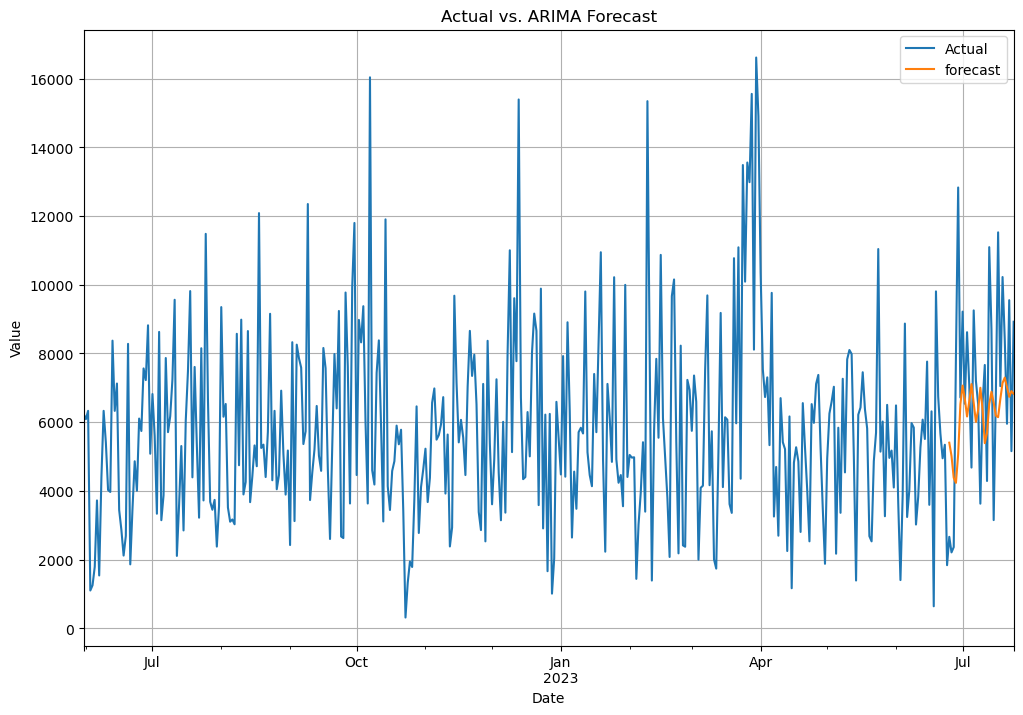

In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your time series data into 'df' DataFrame

# Specify ARIMA order
p = 3  # Autoregressive order
d = 0  # Differencing order
q = 3  # Moving average order

# Fit an ARIMA model with specified order
model = ARIMA(df['Actual'], order=(p, d, q))
results = model.fit()


# Add ARIMA forecast to DataFrame
df['forecast'] = results.predict(start=390, end=420, dynamic=False)

# Plot Actual and ARIMA Forecast
df[['Actual', 'forecast']].plot(figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()


<br/>

### Calculating RMSE

In [33]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Load your data and preprocess if needed
# data = ...

# Specify the ARIMA order
arima_order = (3, 0, 3)

# Train-test split
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train_data['Actual'], order=arima_order)
arima_fit = arima_model.fit()

# Forecast using ARIMA model
forecast = arima_fit.forecast(steps=len(test_data))
forecast_values = forecast.values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Actual'], forecast_values))
print("Root Mean Squared Error (RMSE) for ARIMA:", rmse)


# Calculate MAE
mae = mean_absolute_error(test_data['Actual'], forecast_values)
print("Mean Absolute Error (MAE) for ARIMA:", mae)


Root Mean Squared Error (RMSE) for ARIMA: 2475.121256126444
Mean Absolute Error (MAE) for ARIMA: 1969.0288246479818


C:\Users\Azwihangwisi\ana\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<br/>

<div style="background-color: #f0f0f0; padding: 20px;">
  <div style="background-color: #fff; padding: 20px; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #333; font-size: 24px; margin-bottom: 10px;">Model Accuracy Assessment</h1>
    <p style="color: #555; font-size: 16px; line-height: 1.5;">
      The <span style="color: #007acc; font-weight: bold;">Root Mean Squared Error (RMSE)</span> is less than the <span style="color: #007acc; font-weight: bold;">standard deviation (std)</span> of the dataset, which indicates that the accuracy of the forecasting model is relatively good. Therefore, the model is performing well in terms of accuracy.
    </p>
  </div>
</div>


<br/>

<div style="background-color: #f9f9f9; padding: 20px;">
  <div style="background-color: #fff; padding: 20px; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #333; font-size: 24px; margin-bottom: 10px;">Data Insights and Learnings</h1>
    <p style="color: #555; font-size: 16px; line-height: 1.5;">
      <span style="color: #007acc; font-weight: bold;">What I've Learned from data:</span>.Over a span of 420 days, an individual's walking habits exhibited both consistency and variability, with step counts ranging from a modest 316 steps to a robust 16,611 steps in a single day. On average, the individual took around 5,838 steps daily, though the broad spread around this average, indicated by a standard deviation of 2,755 steps, showcases the variability in daily walking routines. The median daily step count is 5,501, which is slightly below the mean, hinting at the data being marginally skewed to the right. This skewness could be due to occasional days with exceptionally high step counts, as further evidenced by the notable gap between the third quartile at 7,349 steps and the maximum of 16,611 steps. In summary, while the individual often hovers around the average step count, there are certain days when their activity levels spike significantly.
    </p>
    <p style="color: #555; font-size: 16px; line-height: 1.5;">
      <span style="color: #007acc; font-weight: bold;">Seasonality Insights:</span> The presence of recurring patterns at regular intervals points towards <span style="font-style: italic;">seasonality</span> in the data. This could hold valuable insights for understanding trends and planning strategies.
    </p>
    <p style="color: #555; font-size: 16px; line-height: 1.5;">
      <span style="color: #007acc; font-weight: bold;">Stationarity Analysis:</span> The consistent <span style="font-style: italic;">stationarity</span> of the data's statistical properties over time enhances the credibility of our analysis. This stability increases our confidence in the reliability of results.
    </p>
  </div>
</div>


<br/>

<div style="background-color: #f9f9f9; padding: 20px;">
  <div style="background-color: #fff; padding: 20px; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #333; font-size: 24px; margin-bottom: 10px;">Reflection and Future Approach</h1>
    <p style="color: #555; font-size: 16px; line-height: 1.5;">
      <span style="color: #007acc; font-weight: bold;">Future Strategy:</span> In my next analysis, I'll apply the valuable insights gained from this experience. Recognizing the presence of seasonality in the data has taught me the importance of tailoring my approach.
    </p>
    <p style="color: #555; font-size: 16px; line-height: 1.5;">
      <span style="color: #007acc; font-weight: bold;">Adaptive Approach:</span> I'll ensure that I adapt to the characteristics of the data. If seasonality is detected, I'll opt for SARIMA modeling over ARIMA. This flexibility will lead to more accurate and robust results.
    </p>
    <p style="color: #555; font-size: 16px; line-height: 1.5;">
      <span style="color: #007acc; font-weight: bold;">Continuous Learning:</span> This experience reinforces the importance of continuous learning in data analysis. Staying updated with best practices ensures better decision-making based on data insights.
    </p>
  </div>
</div>
